### Pair Programming Machine Learning / Regresión Lineal 

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.


Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [149]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
plt.rcParams["figure.figsize"] = (10,8)


import warnings
warnings.filterwarnings('ignore')

Los objetivos de hoy son:


1. Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.
2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

----

- En este modelo de ML vamos a intentar predecir el salario. Como en el dataset esta variable está en rangos (<50k, >=50K), para poder realizar los ejercicios nos inventaremos el salario aleatoriamente con un random. ESTO NO SE DEBE HACER NUNCA, la primera conclusión que podemos sacar es que al vernos en la obligación de hacer esto, NO PODRIAMOS HACER UN MODELO DE REGRESION LINEAL CON ESTE DATASET. 

In [150]:
df = pd.read_csv("data/adult.data.csv", index_col = 0)
df.head(2)

,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
39,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [151]:
nuevo_nombre = {col: col.strip().replace(" ", "").lower() for col in df.columns}

In [152]:
df.rename(columns = nuevo_nombre, inplace = True)

In [153]:
renombre = {'white': 'ethnicity',
            'state-gov' : 'work_class',
            'bachelors' : 'education',
            '2174' : 'capital_gain',
            'male' : 'gender',
            '0' : 'capital_lost',
            '13' : 'education_yrs',
            '40' : 'hours_week',
            '77516' : 'final_weight',
            'not-in-family' : 'relationship',
            'never-married' : 'marital_status',
            'adm-clerical' : 'occupation',
            'united-states' : 'country',
            '<=50k' : 'salary'
        
            }

In [154]:
df.rename(columns = renombre, inplace = True)

Eliminamos la columna "final_weight" dado que no la vamos a usar para nada:

In [155]:
df.drop(["final_weight"], axis = 1, inplace = True)

In [156]:
df.shape

(32560, 13)

In [157]:
df["capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [158]:
df["salary"].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [159]:
patron_salario_bajo = "<=50K"
patron_salario_alto = ">50K"

In [160]:
def salario_aleatorio (col):
    for i in col:
        if len(re.findall(patron_salario_bajo, col)) > 0:
            return random.randint(18000, 50000)
        elif len(re.findall(patron_salario_alto, col)) > 0: 
            return random.randint(50000, 300000)

In [161]:
df["salary"] = df["salary"].apply(salario_aleatorio)
df.head()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,18011
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,29747
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,19350


In [162]:
df.shape

(32560, 13)

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
education_yrs,32560.0,10.080590,2.572709,1.0,9.00,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.00,0.0,0.0,99999.0
capital_lost,32560.0,87.306511,402.966116,0.0,0.00,0.0,0.0,4356.0
hours_week,32560.0,40.437469,12.347618,1.0,40.00,40.0,45.0,99.0
salary,32560.0,67973.634828,70382.492664,18000.0,28594.75,39146.5,49614.0,299969.0


In [164]:
df.describe(include='object')

,work_class,education,marital_status,occupation,relationship,ethnicity,gender,country
count,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27815,21789,29169


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 50 to 52
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   work_class      32560 non-null  object
 1   education       32560 non-null  object
 2   education_yrs   32560 non-null  int64 
 3   marital_status  32560 non-null  object
 4   occupation      32560 non-null  object
 5   relationship    32560 non-null  object
 6   ethnicity       32560 non-null  object
 7   gender          32560 non-null  object
 8   capital_gain    32560 non-null  int64 
 9   capital_lost    32560 non-null  int64 
 10  hours_week      32560 non-null  int64 
 11  country         32560 non-null  object
 12  salary          32560 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.5+ MB


In [166]:
df.isnull().sum()

work_class        0
education         0
education_yrs     0
marital_status    0
occupation        0
relationship      0
ethnicity         0
gender            0
capital_gain      0
capital_lost      0
hours_week        0
country           0
salary            0
dtype: int64

In [167]:
df.sample()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
45,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,1887,60,United-States,127156


Hacemos **.unique()** de cada una de las columnas:

In [168]:
df["work_class"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [169]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [170]:
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [171]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [172]:
numericas = df.select_dtypes(include=['int64', 'float64'])
lista_columnas = list(numericas)

In [173]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {}
   
    for col in lista_columnas:
        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)

        IQR = Q3 - Q1
    
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
        
    return dicc_indices 

In [174]:
# Índices de los outliers:

indices = detectar_outliers(lista_columnas, df)

In [175]:
# Columnas con outliers:

indices.keys()

dict_keys(['education_yrs', 'capital_gain', 'capital_lost', 'hours_week', 'salary'])

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
education_yrs,32560.0,10.080590,2.572709,1.0,9.00,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.00,0.0,0.0,99999.0
capital_lost,32560.0,87.306511,402.966116,0.0,0.00,0.0,0.0,4356.0
hours_week,32560.0,40.437469,12.347618,1.0,40.00,40.0,45.0,99.0
salary,32560.0,67973.634828,70382.492664,18000.0,28594.75,39146.5,49614.0,299969.0


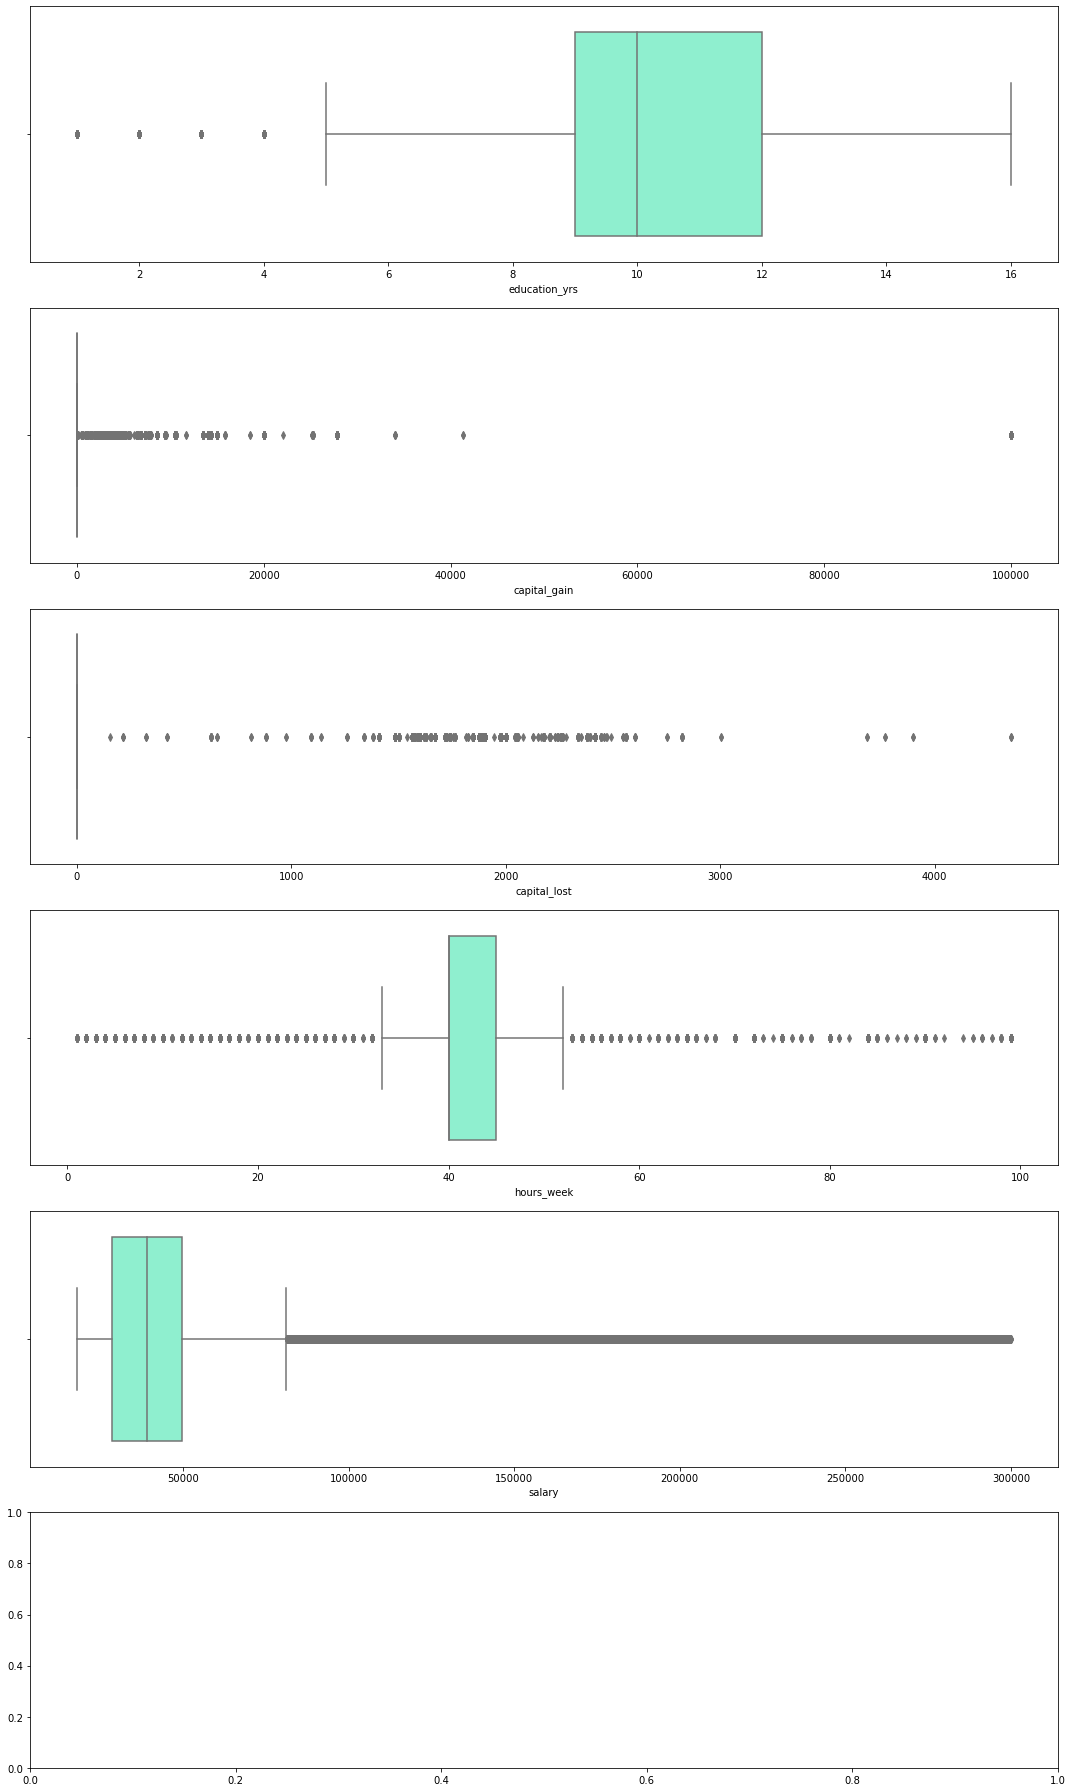

In [177]:
# Outliers visualmente:

fig, axes = plt.subplots(6, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

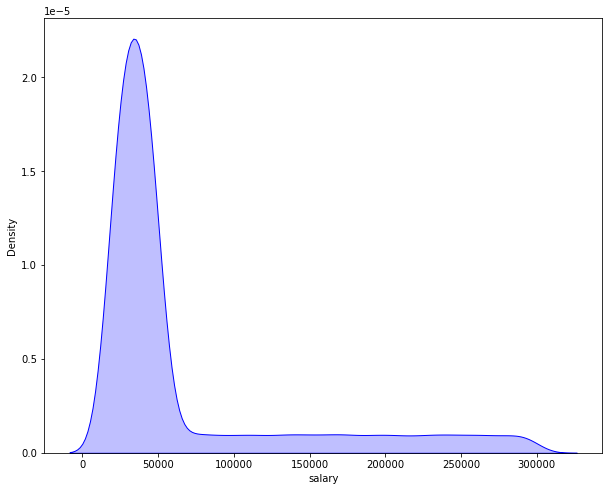

In [178]:
# Visualizacion de como esta distribuida nuestra variable respuesta:

sns.distplot(
    df["salary"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

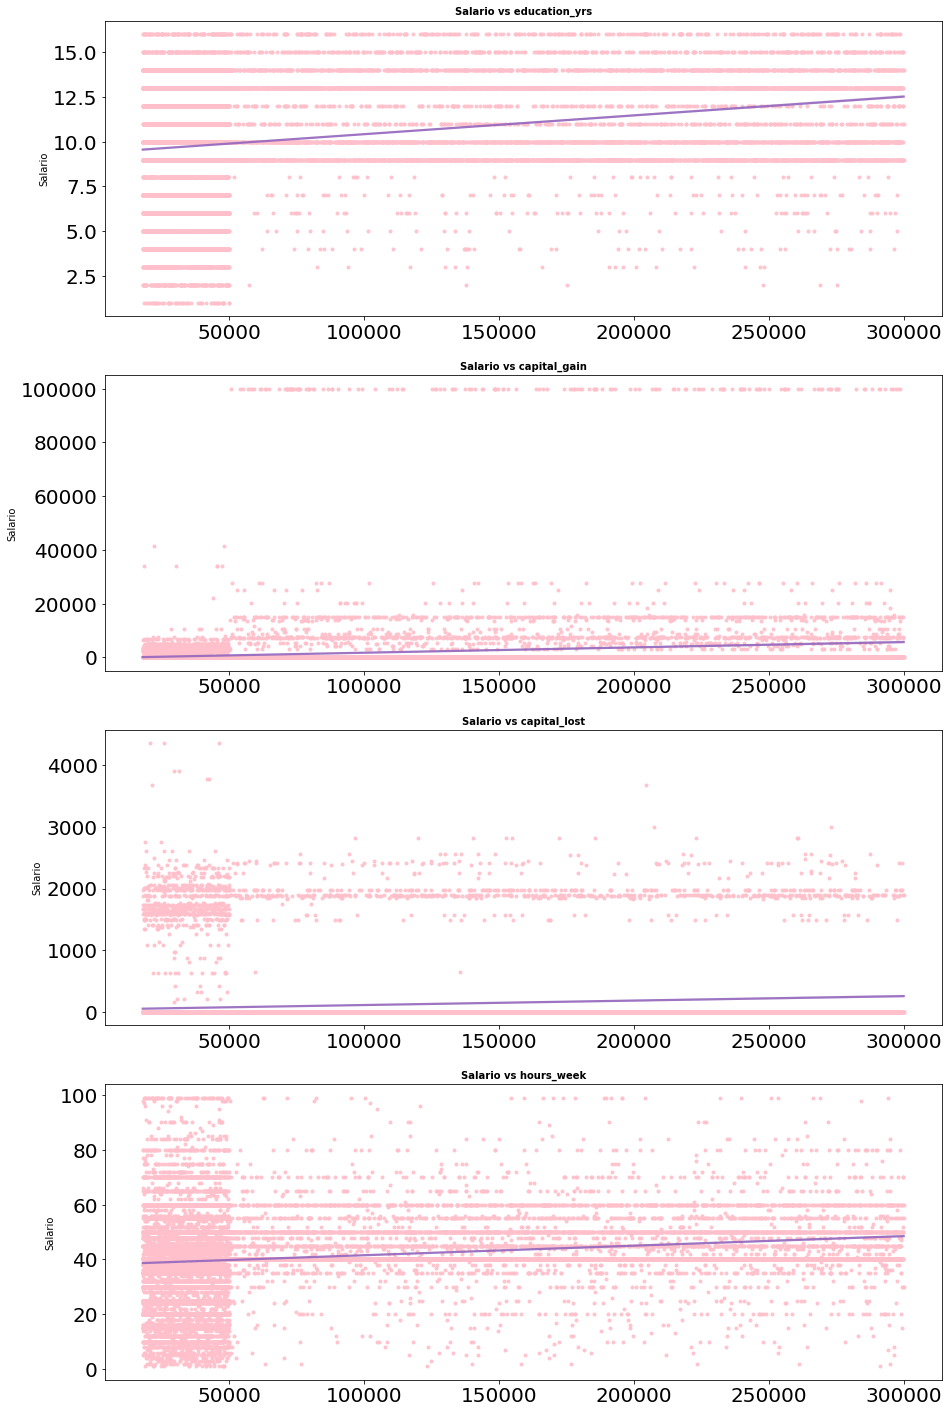

In [179]:
# Visualizacion relacion v.respuesta - v.predictora:

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 25))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("salary")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df["salary"],
        y = df[colum], 
        color = "pink", 
        marker = ".", 
        scatter_kws = {"alpha": 0.9}, 
        line_kws = {"color": "C4", "alpha": 0.9 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Salario vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Salario")
    

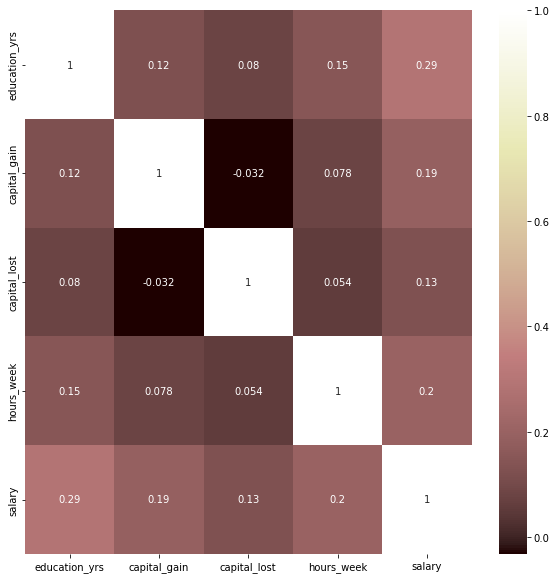

In [180]:
# Vemos con un heatmap la correlacion, el grado de correlacion de todas nuestras variables:

plt.figure(figsize = (10,10))

sns.heatmap(df.corr(), 
           cmap = "pink", 
           annot = True);

En este mapa de calor, podemos observar que existe una **muy leve** correlación entre columnas. La correlación más fuere se da entre los años de educación y las horas trabajadas.

Comprobamos el máximo y el mínimo para filtrar el DataFrame y categorizar la columna de final_weight:

In [181]:
df.to_csv("data/adult.data_limpio.csv")

**Intentar averiguar lo que es el final_weight, por favor.**

Los pesos en los archivos de CPS se controlan según estimaciones independientes de la población civil no institucional de los EE. UU. Estos son preparados mensualmente para nosotros por la División de Población aquí en la Oficina del Censo. Usamos 3 conjuntos de controles.

Estos son:


 Una estimación de una sola celda de la población mayor de 16 años para cada estado.
 Controles de Origen Hispano por edad y sexo.
 Controles por Raza, edad y sexo.


Usamos los tres conjuntos de controles en nuestro programa de ponderación y los "rastrillamos" 6 veces para que al final volvamos a todos los controles que usamos.

El término estimación se refiere a los totales de población derivados de CPS mediante la creación de "recuentos ponderados" de cualquier característica socioeconómica específica de la población.

Las personas con características demográficas similares deberían tener pesos similares. Hay una advertencia importante para recordar acerca de esta declaración. Es decir, dado que la muestra de CPS es en realidad una colección de 51 muestras estatales, cada una con su propia probabilidad de selección, la declaración solo se aplica dentro del estado.


Reconocimiento:

Este conjunto de datos se obtuvo del Repositorio de aprendizaje automático de la Universidad de California, Conjunto de datos de ingresos del censo de Irvine (UC Irvine). La página de UCI menciona a la Oficina del Censo de EE. UU. como la fuente original del conjunto de datos.